# JSON examples and exercise
****
+ get familiar with packages for dealing with JSON
+ study examples with JSON strings and files 
+ work on exercise to be completed and submitted 
****
+ reference: http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader
+ data source: http://jsonstudio.com/resources/
****

In [34]:
import pandas as pd

## imports for Python, Pandas

In [35]:
import json
from pandas.io.json import json_normalize

## JSON example, with string

+ demonstrates creation of normalized dataframes (tables) from nested json string
+ source: http://pandas.pydata.org/pandas-docs/stable/io.html#normalization

In [21]:
# define json string
data = [{'state': 'Florida', 
         'shortname': 'FL',
         'info': {'governor': 'Rick Scott'},
         'counties': [{'name': 'Dade', 'population': 12345},
                      {'name': 'Broward', 'population': 40000},
                      {'name': 'Palm Beach', 'population': 60000}]},
        {'state': 'Ohio',
         'shortname': 'OH',
         'info': {'governor': 'John Kasich'},
         'counties': [{'name': 'Summit', 'population': 1234},
                      {'name': 'Cuyahoga', 'population': 1337}]}]

In [22]:
# use normalization to create tables from nested element
json_normalize(data, 'counties')

,name,population
0,Dade,12345
1,Broward,40000
2,Palm Beach,60000
3,Summit,1234
4,Cuyahoga,1337


In [23]:
# further populate tables created from nested element
json_normalize(data, 'counties', ['state', 'shortname', ['info', 'governor']])

,name,population,state,shortname,info.governor
0,Dade,12345,Florida,FL,Rick Scott
1,Broward,40000,Florida,FL,Rick Scott
2,Palm Beach,60000,Florida,FL,Rick Scott
3,Summit,1234,Ohio,OH,John Kasich
4,Cuyahoga,1337,Ohio,OH,John Kasich


****
## JSON example, with file

+ demonstrates reading in a json file as a string and as a table
+ uses small sample file containing data about projects funded by the World Bank 
+ data source: http://jsonstudio.com/resources/

In [24]:
# load json as string
json.load((open('data/world_bank_projects_less.json')))

[{'_id': {'$oid': '52b213b38594d8a2be17c780'},
  'approvalfy': 1999,
  'board_approval_month': 'November',
  'boardapprovaldate': '2013-11-12T00:00:00Z',
  'borrower': 'FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA',
  'closingdate': '2018-07-07T00:00:00Z',
  'country_namecode': 'Federal Democratic Republic of Ethiopia!$!ET',
  'countrycode': 'ET',
  'countryname': 'Federal Democratic Republic of Ethiopia',
  'countryshortname': 'Ethiopia',
  'docty': 'Project Information Document,Indigenous Peoples Plan,Project Information Document',
  'envassesmentcategorycode': 'C',
  'grantamt': 0,
  'ibrdcommamt': 0,
  'id': 'P129828',
  'idacommamt': 130000000,
  'impagency': 'MINISTRY OF EDUCATION',
  'lendinginstr': 'Investment Project Financing',
  'lendinginstrtype': 'IN',
  'lendprojectcost': 550000000,
  'majorsector_percent': [{'Name': 'Education', 'Percent': 46},
   {'Name': 'Education', 'Percent': 26},
   {'Name': 'Public Administration, Law, and Justice', 'Percent': 16},
   {'Name': 'Educatio

In [25]:
# load as Pandas dataframe
sample_json_df = pd.read_json('data/world_bank_projects_less.json')
sample_json_df

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Name': 'Education for all', 'Percent': 100}","[{'name': 'Education for all', 'code': '65'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Name': 'Other economic management', 'Percent...","[{'name': 'Other economic management', 'code':...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en


****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

### 1. Find the 10 countries with most projects

In [36]:
%pylab inline
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [37]:
df=pd.read_json('data/world_bank_projects.json')

In [30]:
df['countryname'].describe()

count                       500
unique                      118
top       Republic of Indonesia
freq                         19
Name: countryname, dtype: object

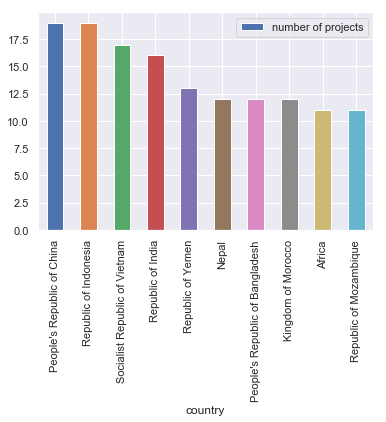

In [49]:
count_country=df.groupby(['countryname']).size()
top_country_proj_count=count_country.sort_values(ascending=False).head(10)
top_country_proj_count_list=list(top_country_proj_count)
top_countryname_list=list(top_country_proj_count.index)
top_country_labels_list=['country','number of projects']
top_country_columns_list=[top_countryname_list,top_country_proj_count_list]
top_country_tup=list(zip(top_country_labels_list, top_country_columns_list))
top_country_dict=dict(top_country_tup)
top_country_dict
df_top_country=pd.DataFrame(top_country_dict)
df_top_country.head()
sns.set()
df_top_country.plot.bar(x='country',y='number of projects')

### 2. Find the top 10 major project themes (using column 'mjtheme_namecode')

In [50]:
data2=json.load((open('data/world_bank_projects.json')))

In [51]:
#Flat column 'mjtheme_namecode' to parse 'code' and 'name' out
df_theme=json_normalize(data2, 'mjtheme_namecode')
df_theme.head()

,code,name
0,8,Human development
1,11,
2,1,Economic management
3,6,Social protection and risk management
4,5,Trade and integration


In [52]:
top_proj_theme=df_theme['code'].value_counts()
# Get the 'code' sequence of top_proj_theme - 'code' sequence sorted by count of each code
top_proj_theme_code_list=list(top_proj_theme.index)
top_theme_count_list=list(top_proj_theme)

In [53]:
# Get the the 'name' sequence corresponding to the 'code' sequence of top_proj_theme
def ThemeName(x):
    theme_name_per_code=df_theme[df_theme['code']==x]
    if (theme_name_per_code.iloc[0][1]).strip() != "":
        return theme_name_per_code.iloc[0][1]
    else:
         return theme_name_per_code.iloc[1][1]
theme_name_list = [ThemeName(x) for x in top_proj_theme_code_list]
theme_name_list    

['Environment and natural resources management',
 'Rural development',
 'Human development',
 'Public sector governance',
 'Social protection and risk management',
 'Financial and private sector development',
 'Social dev/gender/inclusion',
 'Trade and integration',
 'Urban development',
 'Economic management',
 'Rule of law']

In [71]:
top_theme_cols_list=[top_proj_theme_code_list,theme_name_list,top_theme_count_list]
top_theme_lab_list=['code','name','count']
zipped=zip(top_theme_lab_list,top_theme_cols_list)
top_theme_dict=dict(zipped)
df_top_theme=pd.DataFrame(top_theme_dict)


In [72]:
df_top_theme.head(10)

,code,name,count
0,11,Environment and natural resources management,250
1,10,Rural development,216
2,8,Human development,210
3,2,Public sector governance,199
4,6,Social protection and risk management,168
5,4,Financial and private sector development,146
6,7,Social dev/gender/inclusion,130
7,5,Trade and integration,77
8,9,Urban development,50
9,1,Economic management,38


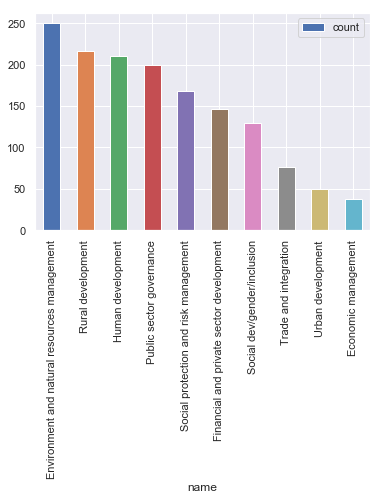

In [73]:
df_top_theme.head(10).plot.bar(x='name',y='count')

### 3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [61]:
df_theme['name'].unique()

array(['Human development', '', 'Economic management',
       'Social protection and risk management', 'Trade and integration',
       'Public sector governance',
       'Environment and natural resources management',
       'Social dev/gender/inclusion',
       'Financial and private sector development', 'Rural development',
       'Urban development', 'Rule of law'], dtype=object)

In [62]:
df_theme['code'].unique()

array(['8', '11', '1', '6', '5', '2', '7', '4', '10', '9', '3'],
      dtype=object)

In [105]:
# Define a function to slice the entire data per 'code', then process missing values within each data slice and return the new data list with no missing value 
def ReplaceMiss(speccode,specname):
    df_theme_percode = df_theme[df_theme['code']==speccode]   
    #df_theme_percode.replace({'name':''},{'name':specname})
    # Must has parameter 'inplace=Trur', otherwise replace looks like does not work
    df_theme_percode.replace(to_replace='',inplace=True,value=specname)
    return df_theme_percode

# Generate a list of sub data slice lists (already get missing value added by calling function RelaceMiss) 
theme_list=[ReplaceMiss(speccode,specname) for speccode in top_proj_theme_code_list for specname in theme_name_list]   

df_code_name_final=pd.concat(theme_list)
df_code_name_final['name'].unique()

array(['Environment and natural resources management',
       'Rural development', 'Human development',
       'Public sector governance',
       'Social protection and risk management',
       'Financial and private sector development',
       'Social dev/gender/inclusion', 'Trade and integration',
       'Urban development', 'Economic management', 'Rule of law'],
      dtype=object)

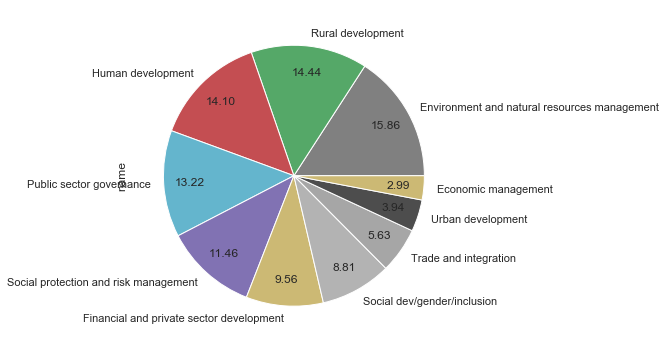

In [109]:
df_code_name_final["name"].value_counts().head(10).plot(kind='pie', labeldistance=1.1, pctdistance=0.8, colors=['0.5','g','r','c','m','y','0.7','0.65','0.3','y'], autopct='%.2f', figsize=(6, 6))